In [1]:
import numpy as np
import os
import cv2
import sklearn
from sklearn.model_selection import train_test_split

DATADIR = "C:/Users/User/Documents/Temirlan/part2"
CATEGORIES = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"]

IMG_SIZE_LENGTH = 540
IMG_SIZE_WIDTH = 90

training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                training_data.append([img_array, class_num])
            except Exception as e:
                pass

In [2]:
create_training_data()

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [4]:
print(len(X))

38416


In [5]:
X = np.array(X).reshape(-1, IMG_SIZE_WIDTH, IMG_SIZE_LENGTH,1)

In [12]:
for i in range(38416):
    X[i] = X[i]/239.0
    

In [18]:
from keras.utils import to_categorical

encoded = to_categorical(y)

Using TensorFlow backend.


In [19]:
print(encoded[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded, test_size=0.2, stratify = encoded)

In [21]:
import keras
from keras import models 
from keras import layers
from keras import optimizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten,  MaxPooling2D, Conv2D
from keras.callbacks import TensorBoard

model = models.Sequential()

model.add(layers.convolutional.Conv2D(32, (5, 5), activation = 'relu', input_shape = (90,540,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.convolutional.Conv2D(32, (5, 5), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.convolutional.Conv2D(32, (5, 5), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dense(16, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 86, 536, 32)       832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 268, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 264, 32)       25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 132, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 128, 32)       25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 64, 32)         0         
_________________________________________________________________
flat

In [22]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data = (X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 30732 samples, validate on 7684 samples
Epoch 1/15
30732/30732 [==============================] - 170s 6ms/step - loss: 0.1774 - acc: 0.9518 - val_loss: 0.0035 - val_acc: 0.9987
Epoch 2/15
30732/30732 [==============================] - 102s 3ms/step - loss: 0.0014 - acc: 0.9996 - val_loss: 1.2392e-04 - val_acc: 1.0000
Epoch 3/15
30732/30732 [==============================] - 101s 3ms/step - loss: 6.1510e-04 - acc: 0.9998 - val_loss: 1.1405e-06 - val_acc: 1.0000
Epoch 4/15
30732/30732 [==============================] - 101s 3ms/step - loss: 2.3749e-04 - acc: 1.0000 - val_loss: 3.8440e-07 - val_acc: 1.0000
Epoch 5/15
30732/30732 [==============================] - 102s 3ms/step - loss: 1.5799e-07 - acc: 1.0000 - val_loss: 1.5716e-07 - val_acc: 1.0000
Epoch 6/15
30732/30732 [==============================] - 102s 3ms/step - loss: 1.1964e-07 - acc: 1.0000 - val_loss: 1.3561e-07 - val_acc: 1.0000
Epoch 7/15
30732/30732 [===============

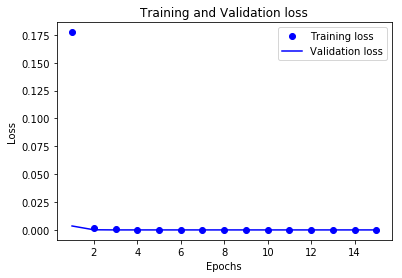

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, 16) 

plt.plot(epochs, loss, 'bo', label = 'Training loss') 
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') 
plt.title('Training and Validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 

plt.show() 

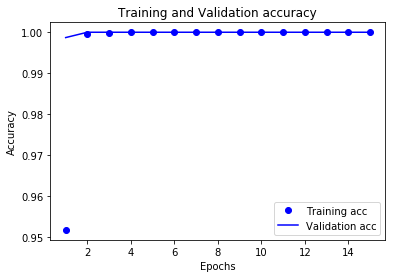

In [25]:
plt.plot(epochs, acc, 'bo', label = 'Training acc') 
plt.plot(epochs, val_acc, 'b', label = 'Validation acc') 
plt.title('Training and Validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 

plt.show()